In [227]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("../app/bat_AAA_900mAh-T1.csv", parse_dates=["read_at", "timestamp"], on_bad_lines="warn")
#df = pd.read_csv("../app/nodemcu-10_10-t1.csv")
#df = pd.read_csv("../app/led-t1.csv")

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

/var/folders/2h/lr4jnn5j0z34s738f_cc5yww0000gn/T/ipykernel_9739/740254797.py:4: ParserWarning: Skipping line 380: expected 8 fields, saw 13

  df = pd.read_csv("../app/bat_AAA_900mAh-T1.csv", parse_dates=["read_at", "timestamp"], on_bad_lines="warn")


,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-16 12:47:17.933823,192,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
1,1,2025-02-16 12:47:17.998887,257,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
2,2,2025-02-16 12:47:18.098908,357,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
3,3,2025-02-16 12:47:18.198870,457,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
4,4,2025-02-16 12:47:18.298854,557,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95929,95930,2025-02-16 15:27:22.712948,508653,2025-02-16 15:27:22,0.0,0.0,0.0,0.0
95930,95931,2025-02-16 15:27:22.811789,508752,2025-02-16 15:27:22,0.0,0.0,0.0,0.0
95931,95932,2025-02-16 15:27:22.914726,508855,2025-02-16 15:27:22,0.0,0.0,0.0,0.0
95932,95933,2025-02-16 15:27:23.037750,508978,2025-02-16 15:27:23,0.0,0.0,0.0,0.0


In [228]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-16 12:47:17.933823,192,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
1,1,2025-02-16 12:47:17.998887,257,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
2,2,2025-02-16 12:47:18.098908,357,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
3,3,2025-02-16 12:47:18.198870,457,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
4,4,2025-02-16 12:47:18.298854,557,1970-01-01 00:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95929,95930,2025-02-16 15:27:22.712948,508653,2025-02-16 15:27:22,0.0,0.0,0.0,0.0
95930,95931,2025-02-16 15:27:22.811789,508752,2025-02-16 15:27:22,0.0,0.0,0.0,0.0
95931,95932,2025-02-16 15:27:22.914726,508855,2025-02-16 15:27:22,0.0,0.0,0.0,0.0
95932,95933,2025-02-16 15:27:23.037750,508978,2025-02-16 15:27:23,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Current')

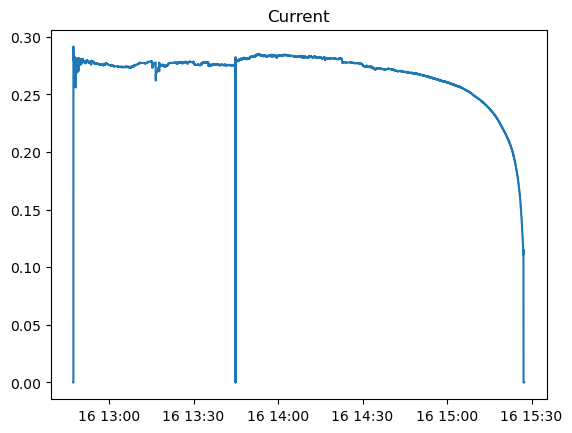

In [229]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

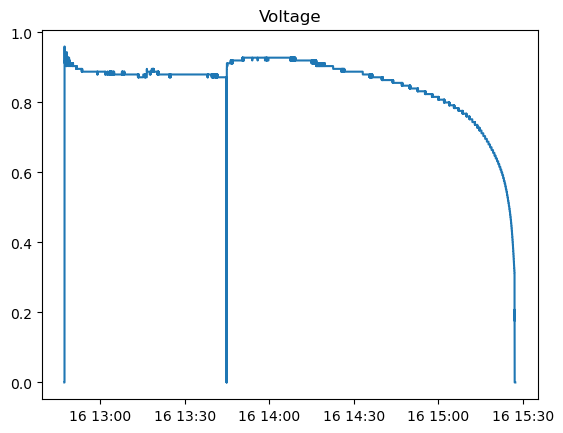

In [230]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [231]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapz(current_data, time_data)
total_current #charge

2573.9246796312004

In [243]:
time_span = max(time_data)
time_span, time_span / 60, time_span / 3600

(9605.176943, 160.08628238333333, 2.668104706388889)

In [233]:
avg_current = total_current / time_span
avg_current

0.2679726458872794

In [234]:
#expected
bat_usable_cap = 0.8 #Amp hour
runtime = bat_usable_cap / avg_current
runtime #hours

2.9853793373242796

In [240]:
#actual
act_runtime = time_span / 3600
act_bat_usable_cap = act_runtime * avg_current
act_bat_usable_cap #Ah

0.7149790776753334

# etc

In [235]:
#v = i * r
#i = v / r
v_bat = 0.94 #volts
c_bat = .8 #Ah
r = 4.5 #ohms

i  = v_bat / r
print(f"{i} A")
p = v_bat * i
print(f"{p} W")

run = c_bat / i
print(f"{run} hours")

0.20888888888888887 A
0.19635555555555553 W
3.829787234042554 hours


In [236]:
1/((1/2.3)+(1/4.7))

1.5442857142857143